Lab02
============

# Objective

분류기법 중 하나인 거리기반 모델 k-Nearest Neighbors를 이해하고 사용하는 것 입니다



# k-Nearest Neighbors

k-Nearest Neighbors(k-NN) 알고리즘은 분류 문제를 해결하기 위해 사용되는 것으로,

분류를 시도할 데이터로부터 k개의 **가장 근접한 데이터**를 확인하여 분류하는 알고리즘입니다.

![title](Images/K-NN.png)

따라서 거리를 구해야 하며, 거리는 일반적으로 차이의 제곱을 더한후 제곱근을 취한 값을 사용합니다

이것을 Euclidean distance라고 부릅니다


### 알고리즘 특징
1. 별도의 학습이 필요 없습니다

    * 분류할 데이터가 주어지면 그 때부터, 가장 가까운 k를 선택하기위하여 계산을 시작하기 때문에 Lazy Learner라고 불립니다
    
    * 또한 train용 데이터를 메모리에 올려둬야 하기 때문에, 공간을 많이 차지합니다
<br><br>

2. 결과가 나오기 까지 시간이 오래걸립니다

    * 위에서 말한 바와 같이 분류할 데이터가 주어진 순간부터 계산을 시작하기 때문에, training에는 시간이 들지 않지만 test를 하는 동안에는 시간이 많이 소요됩니다
    
    
3. k의 값에 따른 성능 변화

    * k값에 따라 같은 테스트 데이터라도 분류된 클래스가 다를 수 있습니다
    * 거리를 구하는 방법이 바뀌어도 분류되는 클래스가 다를 수 있습니다
    
    
### 알고리즘 순서

1. 학습 데이터의 특징 값(벡터)과 항목 분류명(클래스명)을 저장합니다

2. 입력 데이터의 특징 값과 거리가 가장 가까운 k개의 데이터를 학습데이터로부터 수집합니다

3. 수집된 데이터 중 가장 큰 비율을 가진 항목으로 입력 데이터의 항목 분류명을 반환합니다

In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import matplotlib.pyplot as plt
import random
from os.path import join
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

# 1. 데이터 살펴보기
이번 실습에서 우리가 사용할 데이터는 붓꽃 데이터입니다

각 붓꽃마다 꽃받침 길이, 꽃받침 너비, 꽃잎의 길이, 꽃잎의 너비 정보, 그리고 어떤 붓꽃인지 저장되어있으며, 150여개의 sample이 존재합니다



In [2]:
iris_analysis = pd.read_csv(join('data', 'Iris.csv'))
print('sample 갯수 : {}'.format(iris_analysis.shape[0]))
iris_analysis.head()

sample 갯수 : 150


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


각 클래스 별 데이터의 차이를 알아보기 위해 클래스로 분류하겠습니다.
이 데이터에는 setosa, versicolor, virginica 3 종의 붓꽃 종류가 있습니다.

In [3]:
iris_setosa = iris_analysis.loc[iris_analysis['Species'] == 'Iris-setosa']
iris_versicolor = iris_analysis.loc[iris_analysis['Species'] == 'Iris-versicolor']
iris_virginica = iris_analysis.loc[iris_analysis['Species'] == 'Iris-virginica']

각 데이터에 대해 종류별로 Boxplot을 통해 비교해봅시다.

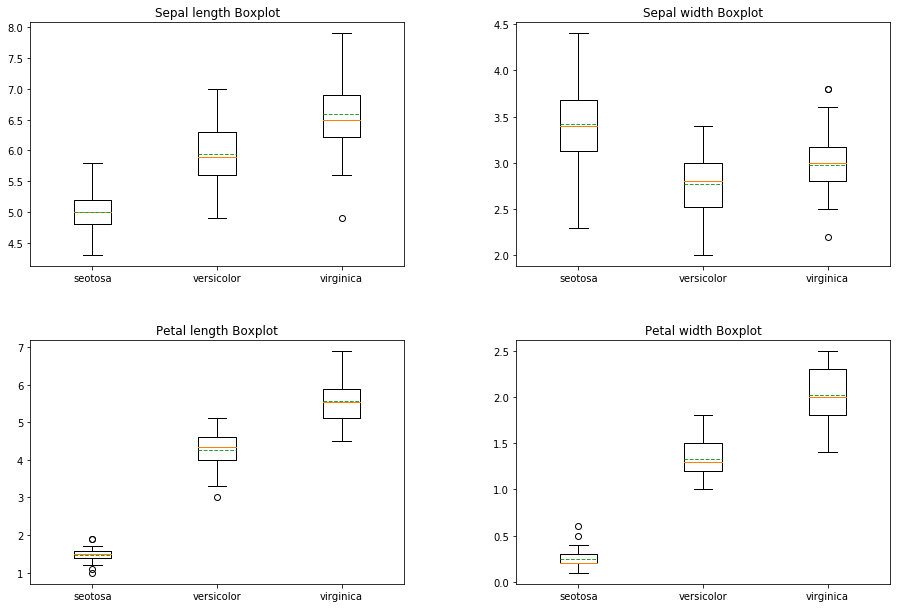

In [4]:
### 주황색은 median, 초록색은 mean

fig, axs = plt.subplots(2,2)

#꽃받침의 길이
axs[0, 0].boxplot([iris_setosa['SepalLengthCm'], iris_versicolor['SepalLengthCm'], iris_virginica['SepalLengthCm']],
           labels = ['seotosa', 'versicolor', 'virginica'],
           meanline = True,
           showmeans = True)
axs[0, 0].set_title('Sepal length Boxplot')

#꽃받침의 너비
axs[0, 1].boxplot([iris_setosa['SepalWidthCm'], iris_versicolor['SepalWidthCm'], iris_virginica['SepalWidthCm']],
           labels = ['seotosa', 'versicolor', 'virginica'],
           meanline = True,
           showmeans = True)
axs[0, 1].set_title('Sepal width Boxplot')

#꽃잎의 길이
axs[1, 0].boxplot([iris_setosa['PetalLengthCm'], iris_versicolor['PetalLengthCm'], iris_virginica['PetalLengthCm']],
           labels = ['seotosa', 'versicolor', 'virginica'],
           meanline = True,
           showmeans = True)
axs[1, 0].set_title('Petal length Boxplot')

#꽃잎의 너비
axs[1, 1].boxplot([iris_setosa['PetalWidthCm'], iris_versicolor['PetalWidthCm'], iris_virginica['PetalWidthCm']],
           labels = ['seotosa', 'versicolor', 'virginica'],
           meanline = True,
           showmeans = True)
axs[1, 1].set_title('Petal width Boxplot')

fig.subplots_adjust(left = 0.01, right = 2, bottom = 0.05, top = 2, hspace = 0.3, wspace = 0.3)

plt.show()

In [5]:
iris = datasets.load_iris()

pd.DataFrame(iris.data, columns=["sepal.length", "sepal.width", "petal.length", "petal.width"]).head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2. 간단한 전처리
시각화의 편리함을 위해 우리는 꽃잎의 길이, 꽃잎의 너비 2가지의 데이터를 활용하여 붓꽃의 종을 분류할 계획입니다.

별도의 학습이라는 것이 필요 없지만 정확도를 살펴보기 위해 학습용 데이터와 테스트용 데이터를 7:3의 비율로 나누었습니다.

그래프의 각 점은 데이터를 의미 하며 붉은색 점이 저희가 분류할 데이터입니다.

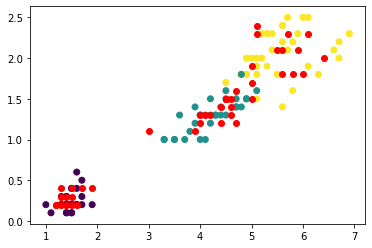

In [6]:
X, prediction_X, y, prediction_y = train_test_split(iris.data[:,2:4], iris.target, test_size=0.3, random_state = 1)
plt.scatter(X[:,0],X[:,1],marker='o', c = y)
plt.scatter(prediction_X[:,0], prediction_X[:,1],marker='o',c='r')
plt.show()

# 3. Scratch로 분류 해보기

### Function get_k_points
임의의 feature와 학습 데이터들 사이의 유클리드 거리를 구하고 이를 정렬한 후 오름차순으로 정렬된 k개의 거리를 반환하는 함수입니다.

In [27]:
def get_k_points(point, k):
    euclidean_distances = np.sqrt(np.sum((X - point) ** 2, axis = 1))
    return np.argsort(euclidean_distances)[:k]

### Function predict
먼저 추정할 샘플의 feature들을 입력받은 후 get_k_points를 수행하여 다른 데이터들보다 가까운 k개의 데이터를 선별합니다<br> 
이후 어떤 Species에 선별된 데이터들이 가장 많이 속하는지 찾아보고 그 중 가장 많이 속한 Species를 예측결과로 사용하는 함수입니다

In [8]:
def predict(predict_point, k):
    results = []
    for point in predict_point:
        min_distances = get_k_points(point, k)
        
        Species= []
        Species_num = [0, 0, 0]
        for close_point in min_distances:
            Species.append(y[close_point])
            
        for temp in Species:
            Species_num[temp] += 1
        results.append([Species_num.index(max(Species_num))])
    return results

### Predict

추정할 점들에 대한 Species결과를 확인해봅니다.<br>
Scratch로 구현한 kNN Algorithm에서는 15개의 보다 가까운 이웃을 찾아 예측해보려합니다

In [9]:
print(predict(prediction_X, 15))

[[0], [1], [1], [0], [2], [1], [2], [0], [0], [2], [1], [0], [2], [1], [1], [0], [1], [1], [0], [0], [1], [1], [2], [0], [2], [1], [0], [0], [1], [2], [1], [2], [1], [2], [2], [0], [1], [0], [1], [2], [2], [0], [1], [2], [1]]


추정한 결과와 실제 데이터가 일치하는지 출력해봅니다.

In [33]:
result = predict(prediction_X, 15)
pred=np.array([result[i] == prediction_y[i] for i in range(0,prediction_y.size)]).reshape(-1,)
print(pred)

print('\nAccuracy = %.2f%%'%(sum(pred)/len(pred)*100))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]

Accuracy = 97.78%


# 4. sklearn으로 분류해보기

In [13]:
# k 값을 의미하는 변수
n_neighbors = 15

## 4-1. 정확도 출력

Scratch로 작성한 것과 마찬가지로 별도의 voting weight없이 수행하는 코드입니다.

In [14]:
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

print("uniform  학습 세트 정확도  : {:.3f}%".format(clf.score(X, y) * 100))
print("uniform  테스트 세트 정확도: {:.3f}%".format(clf.score(prediction_X, prediction_y) * 100))

uniform  학습 세트 정확도  : 97.143%
uniform  테스트 세트 정확도: 95.556%


### Weighted Vote
K-NN은 **가장 닮은 데이터**의 클래스가 테스트 데이터의 클래스로 추정합니다. 그렇다면 가장 가까운 데이터와 k번째 가까운 데이터 둘 중 어느 데이터의 클래스가 더 테스트 데이터의 클래스에 가까울까요?

아래는 sklearn에서 제공하는 **거리**를 voting weight로 설정하여 수행하는 코드입니다.

In [15]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf2.fit(X, y)

print("distance 학습 세트 정확도  : {:.3f}%".format(clf2.score(X, y) * 100))
print("distance 테스트 세트 정확도: {:.3f}%".format(clf2.score(prediction_X, prediction_y) * 100))

distance 학습 세트 정확도  : 99.048%
distance 테스트 세트 정확도: 95.556%


## 4-2. 그래프 출력
그래프 시각화를 위한 변수들입니다.

In [16]:
#Mash를 그릴 때 간격을 결정하는 변수
h = .02

#cmap_light = Mash에 표시될 3가지 색상
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
#cmap_bold = 학습 데이터를 표시할 3가지 색상
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#그래프 범위 설정을 위한 변수
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

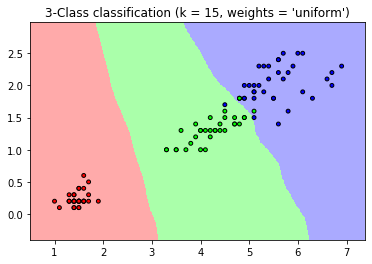

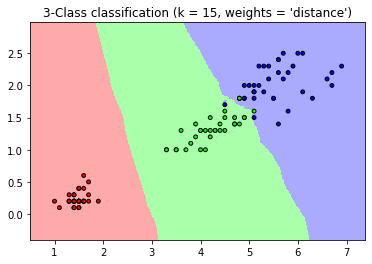

In [17]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=15)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = 'uniform')"
          % (n_neighbors))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=15)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = 'distance')"
          % (n_neighbors))
plt.show()

# 5. 실습
위의 예제는 꽃잎의 길이, 꽃잎의 너비만 사용하여 분류를 수행하였습니다

이제, 사용하지 않은 다른 특징(꽃받침의 길이, 너비)들도 사용하여 위에서 수행한 k-NN분류를 해보시고 결과를 확인해보세요.

In [36]:
X, prediction_X, y, prediction_y = train_test_split(iris.data[:,0:4], iris.target, test_size=0.3, random_state = 1)

## 5-1 Find neighbors 
kNN Classification은 선택하는 이웃의 갯수와 거리에 민감한 모델이라고 소개해드렸습니다

따라서 두가지가 변할 때, 결과의 변화를 보려합니다

먼저, 이웃의 갯수를 바꿔가며 결과를 살펴보도록 하겠습니다

In [42]:
for i in range(1,20):

    clf3=neighbors.KNeighborsClassifier(n_neighbors=i,weights='distance')

    clf3.fit(X, y)
    print('선택된 이웃의 갯수 : %d'%i)
    print("학습 세트 정확도  : {:.3f}%".format(clf3.score(X, y) * 100))
    print("테스트 세트 정확도: {:.3f}%\n".format(clf3.score(prediction_X, prediction_y) * 100))

선택된 이웃의 갯수 : 1
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 2
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 3
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 4
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 5
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 6
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 7
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 95.556%

선택된 이웃의 갯수 : 8
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 9
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 95.556%

선택된 이웃의 갯수 : 10
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 11
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 12
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 13
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 14
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 15
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 16
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 17
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃

모든 데이터를 사용하여  이웃의 갯수에 따라 학습 세트의 정확도는 변하였지만, 테스트 세트에 대한 정확도도 높습니다

하지만 모든 데이터에 대해 선택되는 이웃의 갯수가 적을수록 결과가 좋아지는 것은 아니기에 각 데이터마다 적절한 이웃의 갯수를 찾아주셔야 합니다


## 5-2 Feature scaling

연속적인 값을 갖고 있는 Feature들은 값의 단위가 의미를 가질 때가 있습니다

하지만 값의 단위가 크게 차이난다면 보다 큰 단위의 값이 작은 단위의 값을 무의미하게 만드는 일이 발생하게 됩니다

따라서, 이러한 문제점을 제거하기 위해 거리를 재조정하는 과정이 필요합니다

붓꽃 데이터의 값을 조정해보고 결과를 살펴보겠습니다

scikit-learn의 StandardScaler는 데이터의 feature들을 각각 평균은 0으로, 분산은 1로 바꿔줍니다

그리고, 거리가 비슷해졌기 때문에, weights는 거리가 반영된 것으로 계산하겠습니다

In [41]:
from sklearn.preprocessing import StandardScaler

scl1=StandardScaler()
scl_train=scl1.fit_transform(X)
scl_test=scl1.transform(prediction_X)


for i in range(1,20):

    clf3=neighbors.KNeighborsClassifier(n_neighbors=i,weights='distance')

    clf3.fit(scl_train, y)
    print('선택된 이웃의 갯수 : %d'%i)
    print("학습 세트 정확도  : {:.3f}%".format(clf3.score(scl_train, y) * 100))
    print("테스트 세트 정확도: {:.3f}%\n".format(clf3.score(scl_test, prediction_y) * 100))

선택된 이웃의 갯수 : 1
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 95.556%

선택된 이웃의 갯수 : 2
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 95.556%

선택된 이웃의 갯수 : 3
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 4
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 5
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 95.556%

선택된 이웃의 갯수 : 6
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 7
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 8
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 97.778%

선택된 이웃의 갯수 : 9
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 95.556%

선택된 이웃의 갯수 : 10
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 95.556%

선택된 이웃의 갯수 : 11
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 95.556%

선택된 이웃의 갯수 : 12
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 95.556%

선택된 이웃의 갯수 : 13
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 95.556%

선택된 이웃의 갯수 : 14
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 95.556%

선택된 이웃의 갯수 : 15
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 95.556%

선택된 이웃의 갯수 : 16
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 93.333%

선택된 이웃의 갯수 : 17
학습 세트 정확도  : 100.000%
테스트 세트 정확도: 93.333%

선택된 이웃